<a href="https://colab.research.google.com/github/JSJeong-me/OpenCV_Practitioner_Guide_2/blob/main/counts-000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
src = cv2.imread('./antivirus.jpg')

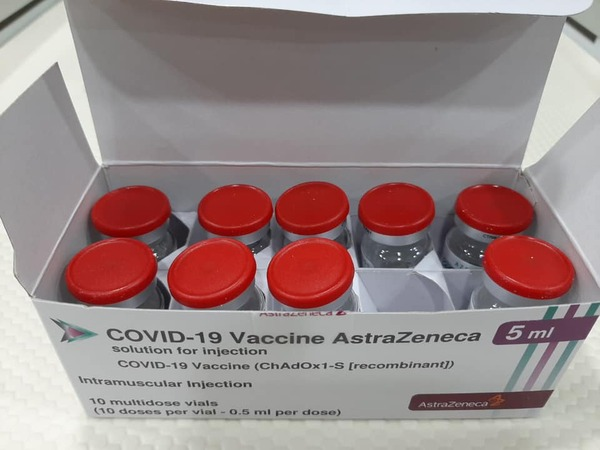

In [3]:
cv2_imshow(src)

In [4]:
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

In [5]:
import numpy as np

In [7]:
low_red = np.array([0, 128, 0])
high_red = np.array([255, 255, 255])

In [8]:
mask = cv2.inRange(src_hsv, low_red, high_red)

In [9]:
result_src = cv2.bitwise_and(src, src, mask = mask)

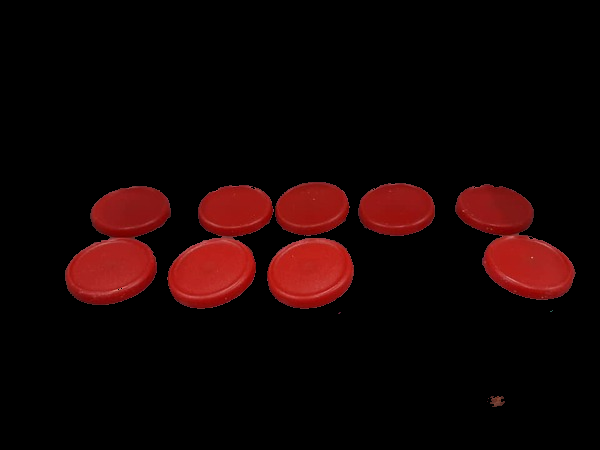

In [10]:
cv2_imshow(result_src)

In [12]:
_, image_thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)

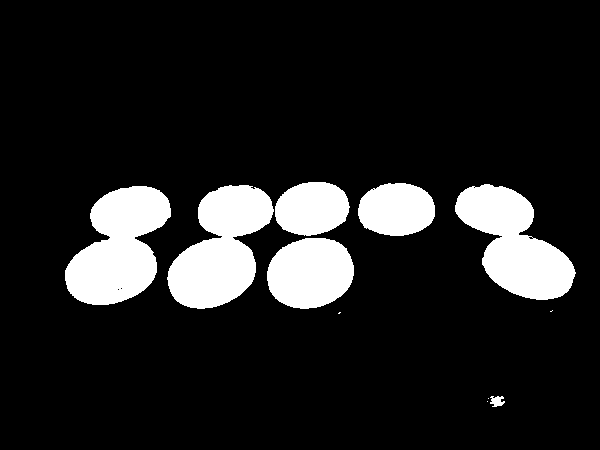

In [13]:
cv2_imshow(image_thresh)

In [14]:
blur = cv2.medianBlur(image_thresh, 9)

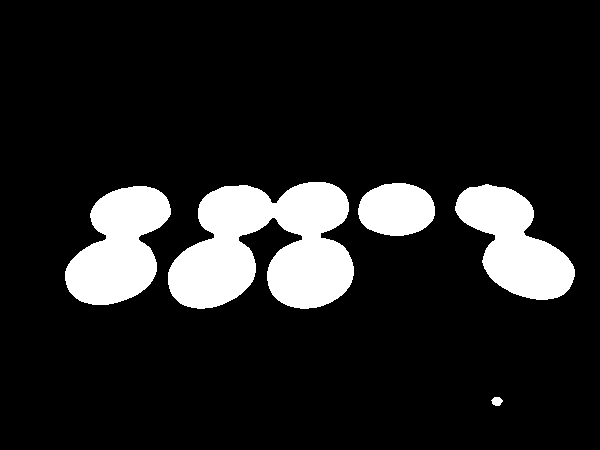

In [15]:
cv2_imshow(blur)

In [16]:
dist_transform = cv2.distanceTransform(blur, cv2.DIST_L2, 3)

In [18]:
ret, isolate_image = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)

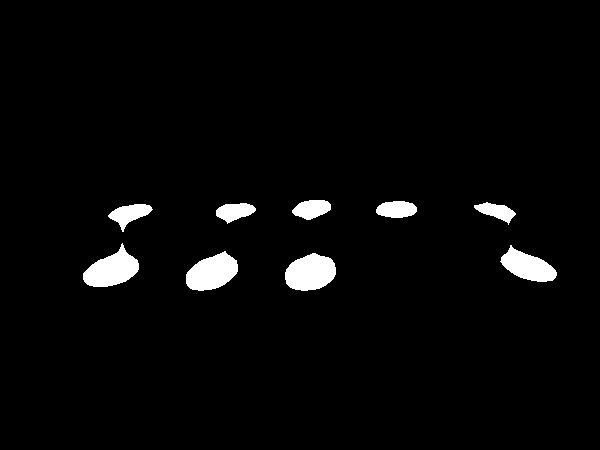

In [19]:
cv2_imshow(isolate_image)

In [20]:
last_image = np.uint8(isolate_image)

In [21]:
cnts, _ = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )

In [23]:
print(len(cnts))

9


In [25]:
for pts in cnts:
  cv2.arcLength(pts, True)
  cv2.drawContours(src, [pts], 0, (0,255,255),5)

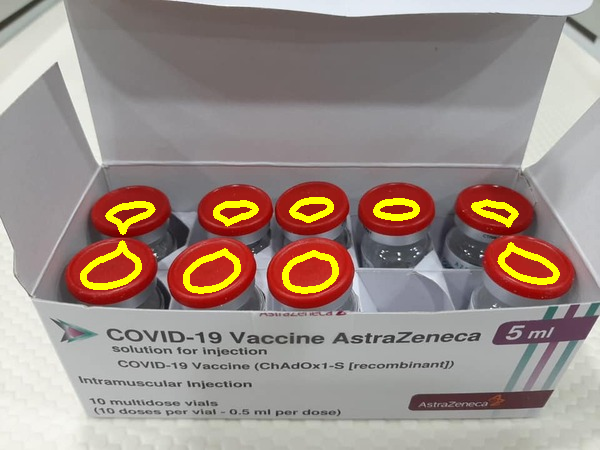

In [28]:
cv2_imshow(src)

In [ ]:
for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(src, [c], -1, (0, 255, 255), 5)
    cv2.putText(src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)

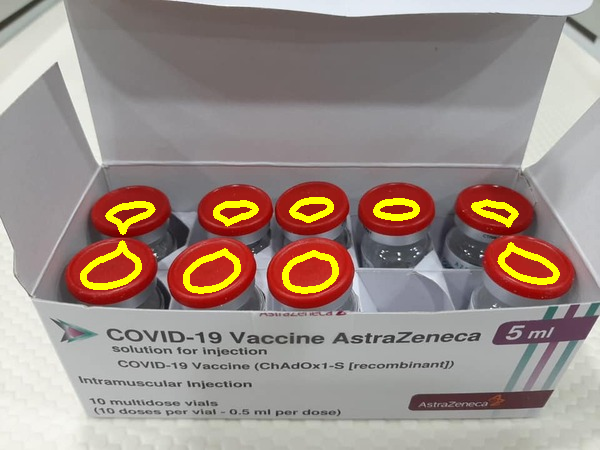

In [30]:
cv2_imshow(src)